In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

In [3]:
df=pd.read_excel('C:\\Users\\a1703197\Downloads\sales_data_sample.xlsx')
df.head(10)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.7,2,2871.00,2003-02-24,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2003-07-05,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2003-01-07,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100,14,5205.27,2003-10-10,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
5,10168,36,96.66,1,3479.76,2003-10-28,Shipped,4,10,2003,...,9408 Furth Circle,NaN,Burlingame,CA,94217,USA,NaN,Hirano,Juri,Medium
6,10180,29,86.13,9,2497.77,2003-11-11,Shipped,4,11,2003,...,"184, chausse de Tournai",NaN,Lille,NaN,59000,France,EMEA,Rance,Martine,Small
7,10188,48,100,1,5512.32,2003-11-18,Shipped,4,11,2003,...,"Drammen 121, PR 744 Sentrum",NaN,Bergen,NaN,N 5804,Norway,EMEA,Oeztan,Veysel,Medium
8,10201,22,98.57,2,2168.54,2003-01-12,Shipped,4,12,2003,...,5557 North Pendale Street,NaN,San Francisco,CA,NaN,USA,NaN,Murphy,Julie,Small
9,10211,41,100,14,4708.44,2004-01-15,Shipped,1,1,2004,...,"25, rue Lauriston",NaN,Paris,NaN,75016,France,EMEA,Perrier,Dominique,Medium


In [4]:
#Tutkitaan tilausten sisältämien kappalemäärien keskiarvoja maittain ja vuosittain
df.pivot_table(values='QUANTITYORDERED', index='COUNTRY', columns='YEAR_ID').style.format('{:.0f}')

YEAR_ID,2003,2004,2005
COUNTRY,,,
Australia,33,34,35
Austria,34,41,36
Belgium,24,35,28
Canada,33,33,32
Denmark,33,34,58
Finland,34,35,35
France,34,35,39
Germany,34,35,nan
Ireland,nan,31,nan


Text(0.5,0,'Quantity ordered Mean')

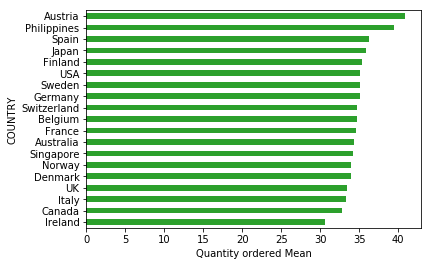

In [5]:
#Havainnollistetaan kuvion avulla vuonna 2004 tehtyjen tilausten sisältämien kappalemäärien keskiarvoja maittain
df[df['YEAR_ID']==2004].pivot_table(values='QUANTITYORDERED', index='COUNTRY').sort_values(
    'QUANTITYORDERED').plot.barh(legend = False, color='C2')
plt.xlabel('Quantity ordered Mean')

In [6]:
#Tutkitaan myyntilukujen keskiarvoja maittain ja vuosittain
df.pivot_table(values='SALES', index='COUNTRY', columns='YEAR_ID').style.format('{:.0f}')

YEAR_ID,2003,2004,2005
COUNTRY,,,
Australia,3287,3575,3374
Austria,3158,4308,4015
Belgium,1674,3479,3130
Canada,3641,2952,3744
Denmark,3674,3649,8671
Finland,3474,4163,3338
France,3595,3406,3796
Germany,3336,3669,nan
Ireland,nan,3610,nan


In [7]:
#Tutkitaan vuoden 2004 maittaisille myyntiluvuille erilaisia tunnuslukuja aggfuncin avulla
df[df['YEAR_ID']==2004].pivot_table(values='SALES', index='COUNTRY', 
    aggfunc = [np.mean, np.median, min, max, np.std]).style.format('{:.0f}')

,mean,median,min,max,std
,SALES,SALES,SALES,SALES,SALES
COUNTRY,,,,,
Australia,3575,3544,1089,9774,1806
Austria,4308,3890,2019,8119,1886
Belgium,3479,3334,1372,6805,1448
Canada,2952,2656,1449,6678,1201
Denmark,3649,3205,1146,7975,1845
Finland,4163,3851,891,10606,2433
France,3406,3093,695,10173,1844
Germany,3669,3012,949,8941,2083


In [9]:
#Tunnuslukuja desribe funktion avulla
df[['SALES','QUANTITYORDERED']].describe().style.format('{:.1f}')

,SALES,QUANTITYORDERED
count,2823.0,2823.0
mean,3553.9,35.1
std,1841.9,9.7
min,482.1,6.0
25%,2203.4,27.0
50%,3184.8,35.0
75%,4508.0,43.0
max,14082.8,97.0


C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


[Text(0,0,'Q1'), Text(0,0,'Q2'), Text(0,0,'Q3'), Text(0,0,'Q4')]

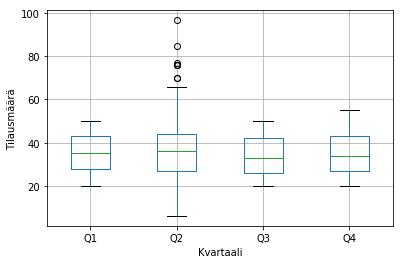

In [13]:
#Tutkitaan tilausmäärien eroja kvartaaleittain
kuvio = df.boxplot('QUANTITYORDERED', by = 'QTR_ID')
plt.title('')
plt.suptitle('')
plt.xlabel('Kvartaali')
plt.ylabel('Tilausmäärä')

kvartaali = ['Q1', 'Q2', 'Q3', 'Q4']
kuvio.set_xticklabels(kvartaali)


In [19]:
#Tutkitaan myyntilukujen ja tilausmäärien korrelaatiota
df[['QUANTITYORDERED', 'SALES']].corr().style.format('{:.2f}')

,QUANTITYORDERED,SALES
QUANTITYORDERED,1.00,0.55
SALES,0.55,1.00


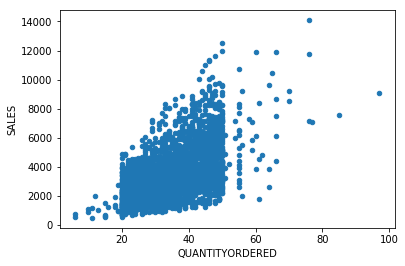

In [20]:
#Myyntiluvut ja tilausmäärät hajontakuviona
df.plot.scatter('QUANTITYORDERED', 'SALES')